[(0, 2), (0, 5), (1, 1), (1, 6), (2, 2), (2, 5), (5, 2), (5, 5), (6, 0)]
(0, 2) + (0, 2) = (1, 6)
(0, 2) + (0, 5) = (None, None)
(0, 2) + (1, 1) = (0, 5)
(0, 2) + (1, 6) = (1, 1)
(0, 2) + (2, 2) = (5, 5)
(0, 2) + (2, 5) = (2, 2)
(0, 2) + (5, 2) = (2, 5)
(0, 2) + (5, 5) = (6, 0)
(0, 2) + (6, 0) = (5, 2)
(0, 5) + (0, 5) = (1, 1)
(0, 5) + (1, 1) = (1, 6)
(0, 5) + (1, 6) = (0, 2)
(0, 5) + (2, 2) = (2, 5)
(0, 5) + (2, 5) = (5, 2)
(0, 5) + (5, 2) = (6, 0)
(0, 5) + (5, 5) = (2, 2)
(0, 5) + (6, 0) = (5, 5)
(1, 1) + (1, 1) = (0, 2)
(1, 1) + (1, 6) = (None, None)
(1, 1) + (2, 2) = (5, 2)
(1, 1) + (2, 5) = (6, 0)
(1, 1) + (5, 2) = (5, 5)
(1, 1) + (5, 5) = (2, 5)
(1, 1) + (6, 0) = (2, 2)
(1, 6) + (1, 6) = (0, 5)
(1, 6) + (2, 2) = (6, 0)
(1, 6) + (2, 5) = (5, 5)
(1, 6) + (5, 2) = (2, 2)
(1, 6) + (5, 5) = (5, 2)
(1, 6) + (6, 0) = (2, 5)
(2, 2) + (2, 2) = (0, 2)
(2, 2) + (2, 5) = (None, None)
(2, 2) + (5, 2) = (0, 5)
(2, 2) + (5, 5) = (1, 6)
(2, 2) + (6, 0) = (1, 1)
(2, 5) + (2, 5) = (0, 5)
(2, 5) + 

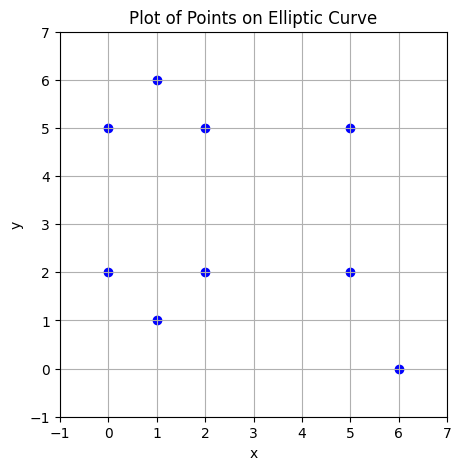

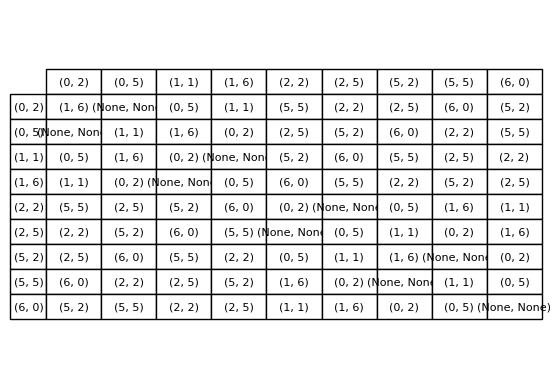

In [ ]:
import random
import matplotlib.pyplot as plt

def modular_sqrt(a, p):
    """ Returns the square root of a modulo p if it exists, using the Tonelli-Shanks algorithm """
    if a == 0:
        return 0
    if pow(a, (p - 1) // 2, p) == p - 1:
        return None  # a is not a quadratic residue modulo p
    if p % 4 == 3:
        return pow(a, (p + 1) // 4, p)

    # Case p % 4 == 1 (Tonelli-Shanks algorithm)
    # Step 1: Decompose p - 1 on the form q * 2^s with q odd
    s = 0
    q = p - 1
    while q % 2 == 0:
        s += 1
        q //= 2

    # Step 2: Find a non-residue z (i.e., a quadratic non-residue modulo p)
    z = 2
    while pow(z, (p - 1) // 2, p) != p - 1:
        z += 1

    # Step 3: Set initial variables
    m = s
    c = pow(z, q, p)
    t = pow(a, q, p)
    r = pow(a, (q + 1) // 2, p)

    # Step 4: Repeat until t == 1
    while t != 1:
        # Find the smallest i such that t^(2^i) == 1
        i = 0
        temp = t
        while temp != 1:
            temp = pow(temp, 2, p)
            i += 1

        # Update values
        b = pow(c, 2 ** (m - i - 1), p)
        m = i
        c = pow(b, 2, p)
        t = (t * c) % p
        r = (r * b) % p

    return r

def find_rational_points(a, b, p):
    rational_points = []
    for x in range(p):
        rhs = (x**3 + a*x + b) % p
        y = modular_sqrt(rhs, p)
        if y is not None:
            rational_points.append((x, y))
            if y != 0 and p != 2 * y:  # Check for the other root only if it's different
                rational_points.append((x, p - y))
    return rational_points

def add_all_points(points, a, p):
    results = []
    n = len(points)
    for i in range(n):
        for j in range(i, n):  # Start from i to include doubling (i.e., adding point to itself)
            P = points[i]
            Q = points[j]
            R = add_points(P, Q, a, p)
            results.append((P, Q, R))
    return results

# Implementation of the inverse_mod and add_points functions remains the same as previously defined

def inverse_mod(k, p):
    # Same implementation as before
    if k == 0:
        raise ZeroDivisionError("division by zero")
    if k < 0:
        return p - inverse_mod(-k, p)
    s, old_s = 0, 1
    t, old_t = 1, 0
    r, old_r = p, k
    while r != 0:
        quotient = old_r // r
        old_r, r = r, old_r - quotient * r
        old_s, s = s, old_s - quotient * s
        old_t, t = t, old_t - quotient * t
    gcd, x, y = old_r, old_s, old_t
    if gcd != 1:
        raise ValueError('inverse_mod does not exist')
    else:
        return x % p

def add_points(P, Q, a, p):
    # Same implementation as before
    if P == (None, None):
        return Q
    if Q == (None, None):
        return P
    x1, y1 = P
    x2, y2 = Q
    if x1 == x2 and y1 != y2:
        return (None, None)  # Vertical line, point at infinity
    if x1 == x2 and y1 == y2:
        if y1 == 0:
            return (None, None)  # Tangent at vertical line through P, point at infinity
        lambda_ = (3 * x1 * x1 + a) * inverse_mod(2 * y1, p) % p
    else:
        lambda_ = (y2 - y1) * inverse_mod(x2 - x1, p) % p
    x3 = (lambda_ * lambda_ - x1 - x2) % p
    y3 = (lambda_ * (x1 - x3) - y1) % p
    return (x3, y3)

def create_cayley_table_plot(points, a, p):
    size = len(points)
    cell_text = []
    for i in range(size):
        row = []
        for j in range(size):
            result = add_points(points[i], points[j], a, p)
            row.append(str(result))
        cell_text.append(row)

    fig, ax = plt.subplots()
    ax.set_axis_off()
    table = ax.table(
        cellText=cell_text,
        rowLabels=[str(p) for p in points],
        colLabels=[str(p) for p in points],
        cellLoc='center',
        loc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(8)  # Adjust the font size if necessary
    table.scale(1, 1.5)  # Adjust the scaling if necessary

    plt.show()

def only_get_rat_points(a, b, p):
    points = find_rational_points(a, b, p)
    print(points)
    return points

def get_point_addition(points, a, p):
    # Using the defined function to add points from the earlier example
    addition_results = add_all_points(points, a, p)
    # Print results
    for P, Q, R in addition_results:
        print(f"{P} + {Q} = {R}")

def plot_points(points):
    # Unpacking points into separate lists
    x_vals, y_vals = zip(*points)

    # Create a scatter plot
    plt.figure(figsize=(5, 5))  # Adjust the figure size as needed
    plt.scatter(x_vals, y_vals, color='blue', marker='o')  # Choose color and marker style

    # Adding labels and title
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Plot of Points on Elliptic Curve')

    # Display grid
    plt.grid(True)

    # Setting axis limits with some margin
    plt.xlim(min(x_vals) - 1, max(x_vals) + 1)
    plt.ylim(min(y_vals) - 1, max(y_vals) + 1)

    # Show plot
    plt.show()

# Example usage
a = 3
b = 4
p = 7
points = only_get_rat_points(a, b, p)
get_point_addition(points, a, p)
plot_points(points)
create_cayley_table_plot(points, a, p)